# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

cld = []
cty = []
dte = []
hum = []
log = []
lat = []
mxs = []
win = []
city_name = []
num = 0
set_data = 1

print(f"Beginning Data Retrieval")

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        num += 1
        print(f"Processing Record {num} of Set {set_data} | {city}")
        city_name.append(response["name"])
        cld.append(response["clouds"]["all"])
        cty.append(response["sys"]["country"])
        dte.append(response["dt"])
        hum.append(response["main"]["humidity"])
        log.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxs.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"]) 
 
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        pass
    if num == 50: 
        set_data += 1
        num = 0

Beginning Data Retrieval
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | santa isabel do rio negro
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | maumere
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | mahon
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | batemans bay
Processing Record 12 of Set 1 | honiara
Processing Record 13 of Set 1 | tenenkou
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | samusu
Missing field/result... skipping.
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Set 1 | taolanaro
Missing field/result... skipping.

Processing Record 37 of Set 4 | college
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | ksenyevka
Missing field/result... skipping.
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | deqing
Processing Record 45 of Set 4 | tabou
Processing Record 46 of Set 4 | steamboat springs
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | ozernovskiy
Processing Record 49 of Set 4 | vitim
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | kerchevskiy
Processing Record 2 of Set 5 | la roda
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | ulladulla
Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | isiro
Processing Record 8 of Set 5 | port-gentil
Processing Record 9 of Set 5 | takoradi


Processing Record 27 of Set 8 | bairiki
Processing Record 28 of Set 8 | mys shmidta
Missing field/result... skipping.
Processing Record 29 of Set 8 | srednekolymsk
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | poya
Processing Record 32 of Set 8 | yeniseysk
Processing Record 33 of Set 8 | menomonie
Processing Record 34 of Set 8 | barentsburg
Missing field/result... skipping.
Processing Record 35 of Set 8 | linhares
Processing Record 36 of Set 8 | arlit
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | mayya
Processing Record 39 of Set 8 | hurricane
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | hit
Processing Record 42 of Set 8 | sinkat
Missing field/result... skipping.
Processing Record 43 of Set 8 | nizhneyansk
Missing field/result... skipping.
Processing Record 44 of Set 8 | ohara
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | san pedro
P

Processing Record 8 of Set 12 | mandalgovi
Processing Record 9 of Set 12 | khonuu
Missing field/result... skipping.
Processing Record 10 of Set 12 | sikasso
Processing Record 11 of Set 12 | coos bay
Processing Record 12 of Set 12 | garmsar
Processing Record 13 of Set 12 | chipinge
Processing Record 14 of Set 12 | gravdal
Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | krasnoselkup
Processing Record 17 of Set 12 | inirida
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | jiddah
Missing field/result... skipping.
Processing Record 20 of Set 12 | puerto narino
Processing Record 21 of Set 12 | gao
Processing Record 22 of Set 12 | ocotlan
Processing Record 23 of Set 12 | hambantota
Processing Record 24 of Set 12 | filadelfia
Processing Record 25 of Set 12 | hutchinson
Processing Record 26 of Set 12 | san policarpo
Processing Record 27 of Set 12 | high level
Processing Record 28 of Set 12 | santiago
Processing Record 29 of Set 12 | samandag
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Display the DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Latitude": lat,
                        "Longitude": log,
                        "Max Temp": mxs,
                        "Humidity": hum,
                        "Cloudiness": cld,
                        "Wind Speed": win,
                        "Country": cty,
                        "Date": dte})
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,50.50,78,57,18.72,NZ,1594358844
1,Santa Isabel Rio Negro,-0.41,-65.02,72.41,96,47,1.21,BR,1594358769
2,Arraial do Cabo,-22.97,-42.03,69.75,71,21,12.84,BR,1594358844
3,Rikitea,-23.12,-134.97,66.94,71,20,20.74,PF,1594358396
4,Maumere,-8.62,122.21,82.78,62,57,2.42,ID,1594358845


In [14]:
#Export ther city data into a .csv
city_df.to_csv("weather_py_data.csv", encoding="utf-8", index=False)
city_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,50.50,78,57,18.72,NZ,1594358844
1,Santa Isabel Rio Negro,-0.41,-65.02,72.41,96,47,1.21,BR,1594358769
2,Arraial do Cabo,-22.97,-42.03,69.75,71,21,12.84,BR,1594358844
3,Rikitea,-23.12,-134.97,66.94,71,20,20.74,PF,1594358396
4,Maumere,-8.62,122.21,82.78,62,57,2.42,ID,1594358845


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# No cities over 100% humidity (skipping)
city_df.max()["Humidity"]

100

In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [18]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
#plt.savefig("../Images/IceCreamSales.png")
# plt.show()

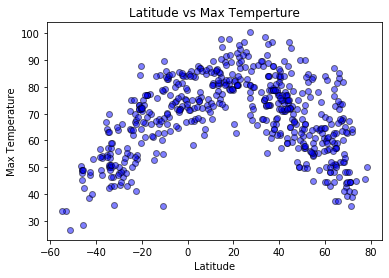

In [23]:
plt.scatter(city_df["Latitude"],city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperture")
plt.show()



## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression